# Joe Biden Stock Portfolio

https://en.wikipedia.org/wiki/Joe_Biden

https://investorplace.com/2021/01/7-stocks-to-buy-as-the-biden-presidency-begins/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'BATT','CNHI','GM','PSI', 'MEG','SIMS','URI']
start = '2021-01-20'
end = '2022-03-25'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  8 of 8 completed


,BATT,CNHI,GM,MEG,PSI,SIMS,SPY,URI
Date,,,,,,,,
2021-01-20,17.753376,13.685084,55.860001,41.599998,120.237183,45.233753,377.666870,260.200012
2021-01-21,17.958559,13.724809,55.080002,41.970001,120.726166,45.169468,378.011169,259.220001
2021-01-22,18.066038,13.565911,55.400002,42.490002,120.237183,45.187271,376.673218,258.589996
2021-01-25,18.163746,12.910458,53.389999,42.459999,119.299164,44.909363,378.158783,253.520004
2021-01-26,18.193058,12.890594,52.040001,40.130001,116.674675,45.216938,377.568481,248.210007


In [3]:
df.tail()

,BATT,CNHI,GM,MEG,PSI,SIMS,SPY,URI
Date,,,,,,,,
2022-03-18,16.480000,15.720000,44.820000,52.189999,132.798004,40.723999,444.519989,346.239990
2022-03-21,16.500000,16.190001,43.610001,49.700001,131.830002,40.414001,444.390015,347.799988
2022-03-22,16.799999,16.530001,44.560001,50.240002,132.949997,40.812000,449.589996,356.359985
2022-03-23,16.820000,16.459999,43.779999,48.049999,129.679993,40.349998,443.799988,354.429993
2022-03-24,17.070000,16.670000,44.349998,47.150002,135.139999,40.784000,450.489990,358.980011


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
BATT: 14299.999999999998
CNHI: 14299.999999999998
GM: 14299.999999999998
MEG: 14299.999999999998
PSI: 14299.999999999998
SIMS: 14299.999999999998
SPY: 14299.999999999998


In [8]:
print('Number of Shares:')
percent_invest = [0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
BATT: 805
CNHI: 1044
GM: 255
MEG: 343
PSI: 118
SIMS: 316
SPY: 37


In [9]:
print('Beginning Value:')
percent_invest = [0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
BATT: $14291.47
CNHI: $14287.23
GM: $14244.3
MEG: $14268.8
PSI: $14187.99
SIMS: $14293.87
SPY: $13973.67


In [10]:
print('Current Value:')
percent_invest = [0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
BATT: $13741.35
CNHI: $17403.48
GM: $11309.25
MEG: $16172.45
PSI: $15946.52
SIMS: $12887.74
SPY: $16668.13


In [11]:
result = []
percent_invest = [0.143, 0.143, 0.143, 0.143, 0.143, 0.143, 0.143]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $104128.92


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: BATT: -3.85%
Holding Period Return: CNHI: 21.81%
Holding Period Return: GM: -20.61%
Holding Period Return: MEG: 13.34%
Holding Period Return: PSI: 12.389999999999999%
Holding Period Return: SIMS: -9.84%
Holding Period Return: SPY: 19.28%
Holding Period Return: URI: 37.96%


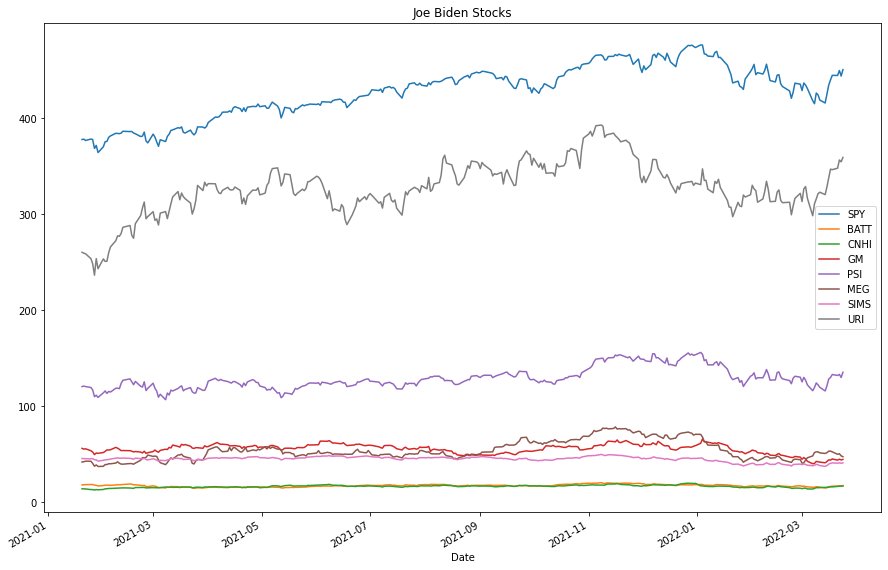

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Joe Biden Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

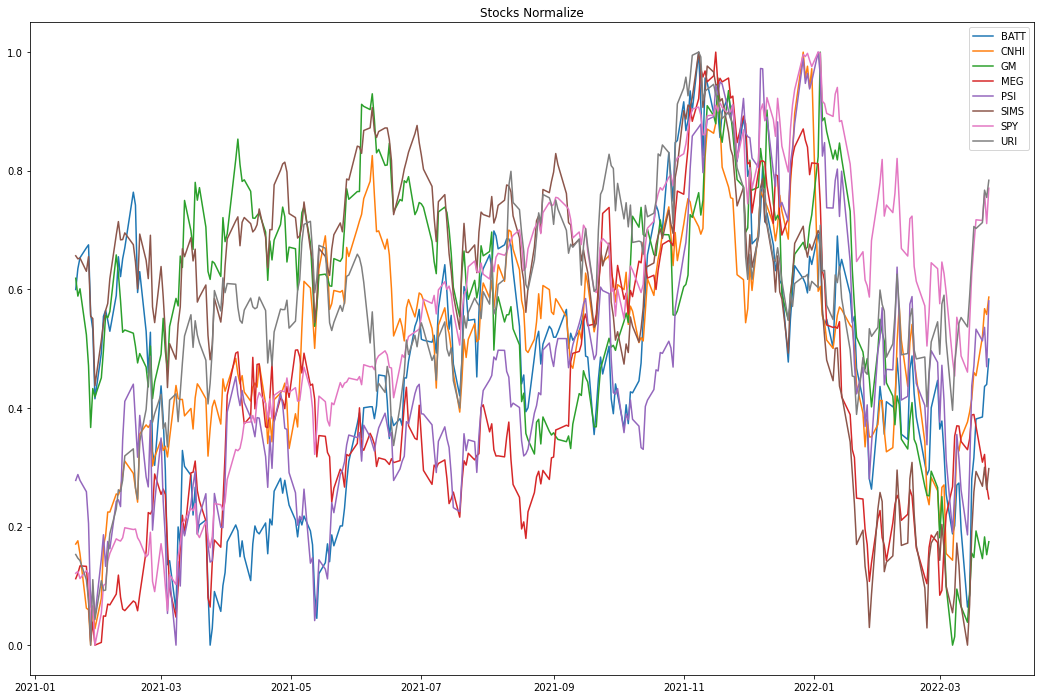

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

BATT     14.255463
CNHI     12.463557
GM       39.830002
MEG      36.980000
PSI     106.555954
SIMS     37.092564
SPY     364.070892
URI     236.270004
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
BATT: 20.088573455810547
CNHI: 19.6299991607666
GM: 65.73999786376953
PSI: 155.80685424804688
MEG: 78.20999908447266
SIMS: 49.49169158935547
URI: 392.7900085449219


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,BATT Return,CNHI Return,GM Return,PSI Return,MEG Return,SIMS Return,URI Return
Date,,,,,,,,
2021-01-21,0.000912,0.011557,0.002903,-0.013963,0.004067,0.008894,-0.001421,-0.003766
2021-01-22,-0.003539,0.005985,-0.011577,0.005810,-0.004050,0.012390,0.000394,-0.002430
2021-01-25,0.003944,0.005408,-0.048316,-0.036282,-0.007801,-0.000706,-0.006150,-0.019606
2021-01-26,-0.001561,0.001614,-0.001539,-0.025286,-0.021999,-0.054875,0.006849,-0.020945


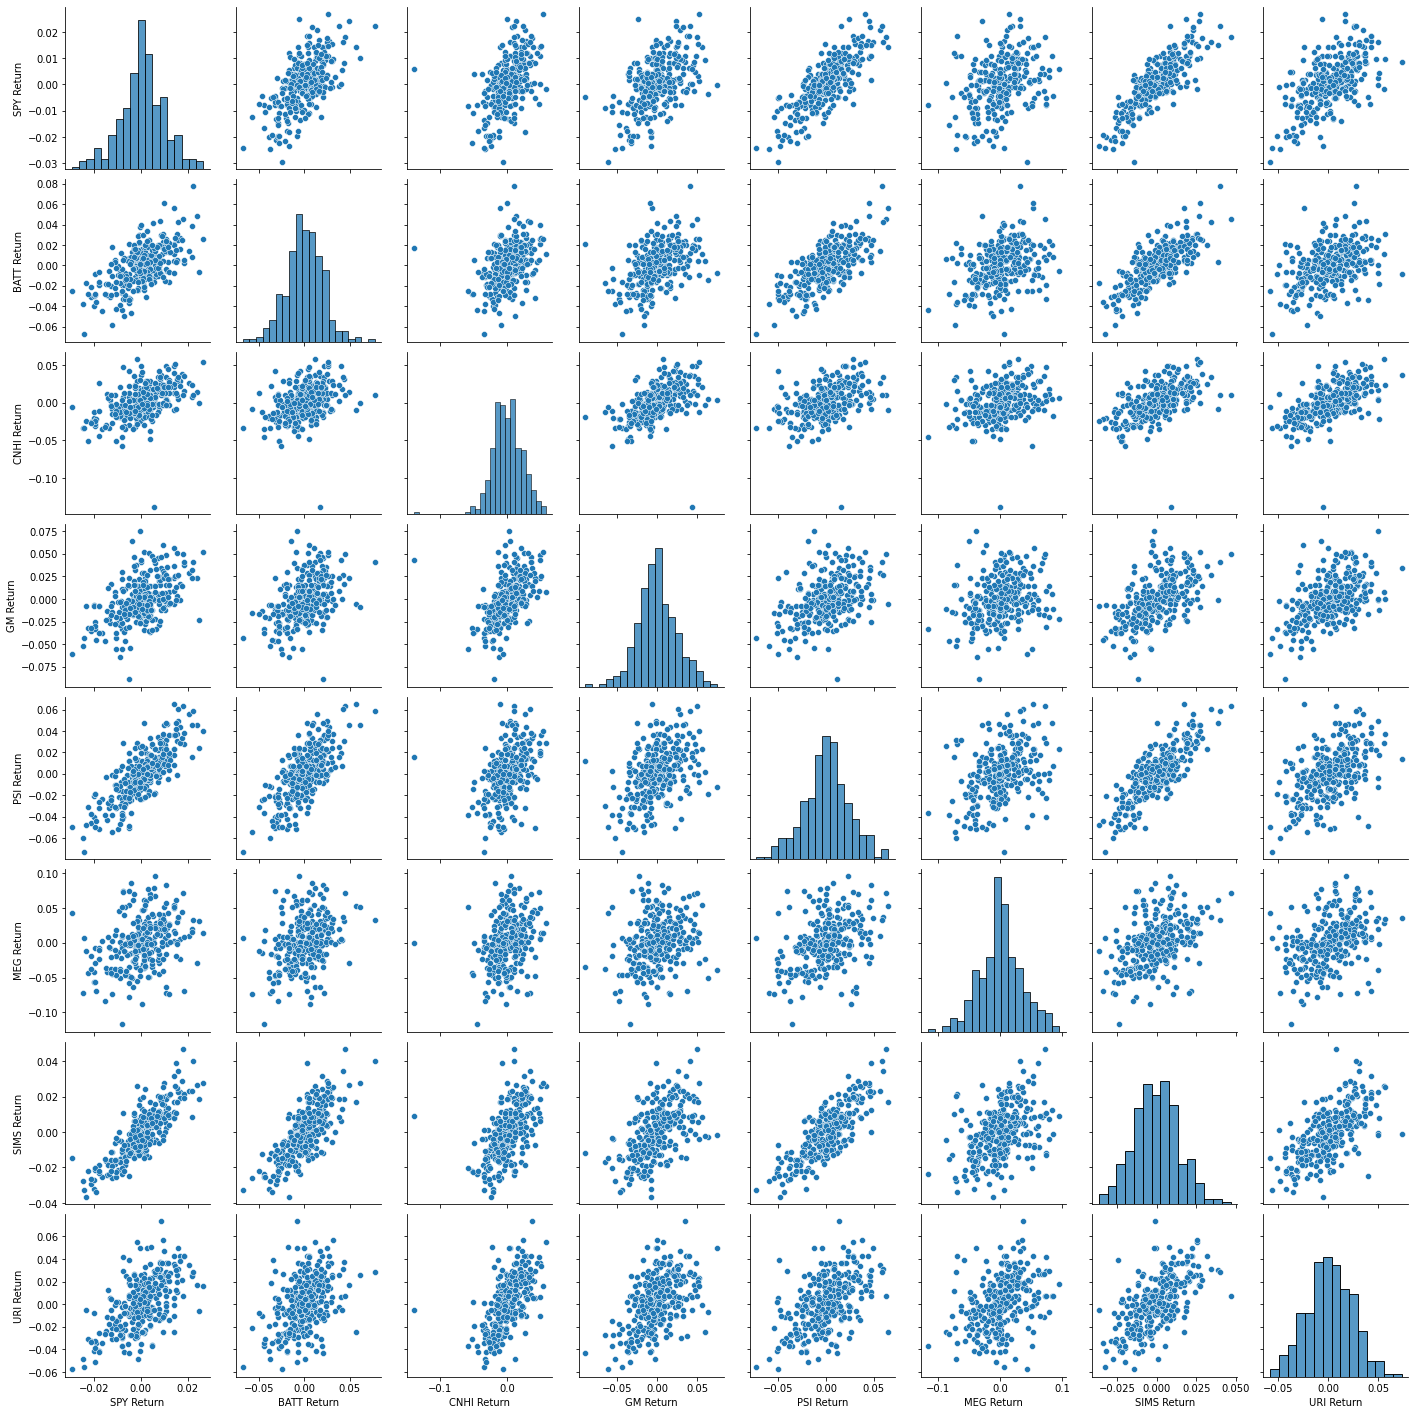

In [19]:
sns.pairplot(returns[1:] )

In [20]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return    2022-03-09
BATT Return   2022-03-16
CNHI Return   2021-02-19
GM Return     2022-01-04
PSI Return    2021-03-09
MEG Return    2021-03-15
SIMS Return   2022-01-31
URI Return    2021-01-28
dtype: datetime64[ns]


In [21]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return    2022-03-07
BATT Return   2021-02-25
CNHI Return   2022-01-03
GM Return     2021-08-04
PSI Return    2021-02-25
MEG Return    2021-03-23
SIMS Return   2022-02-03
URI Return    2022-03-07
dtype: datetime64[ns]


In [22]:
returns.corr()

,SPY Return,BATT Return,CNHI Return,GM Return,PSI Return,MEG Return,SIMS Return,URI Return
SPY Return,1.000000,0.623970,0.497782,0.514473,0.797991,0.326733,0.828865,0.596394
BATT Return,0.623970,1.000000,0.373966,0.433007,0.709594,0.350803,0.761377,0.397698
CNHI Return,0.497782,0.373966,1.000000,0.509360,0.430850,0.280612,0.548880,0.599167
GM Return,0.514473,0.433007,0.509360,1.000000,0.428012,0.234630,0.552641,0.520595
PSI Return,0.797991,0.709594,0.430850,0.428012,1.000000,0.392271,0.821428,0.508539
MEG Return,0.326733,0.350803,0.280612,0.234630,0.392271,1.000000,0.424826,0.363698
SIMS Return,0.828865,0.761377,0.548880,0.552641,0.821428,0.424826,1.000000,0.631176
URI Return,0.596394,0.397698,0.599167,0.520595,0.508539,0.363698,0.631176,1.000000


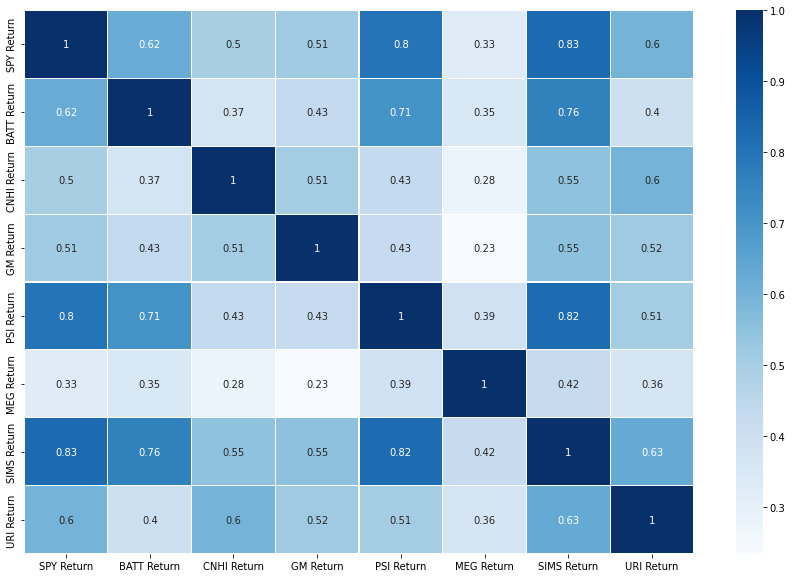

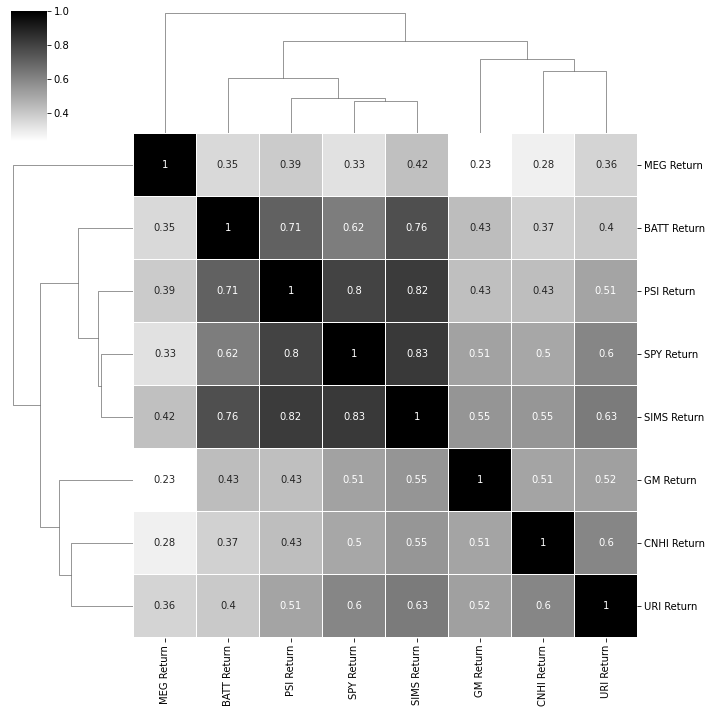

In [23]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

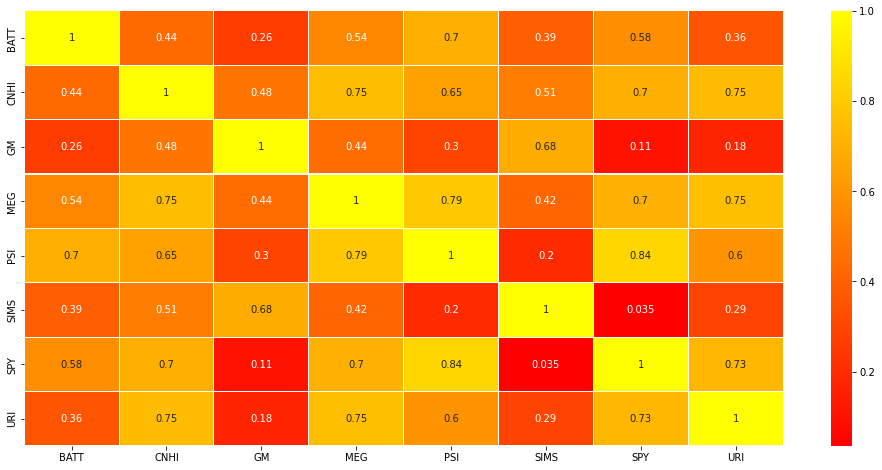

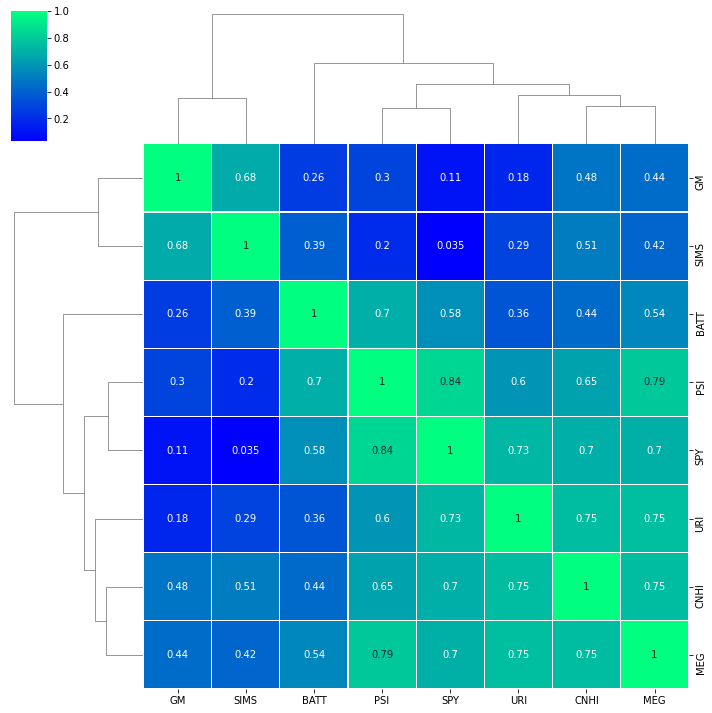

In [24]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [25]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [26]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [27]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.02573019 -0.02740412 -0.03143616 -0.04282259 -0.02948357 -0.01838902
                     -0.01153275 -0.02793561]
95%                 [-0.03304433 -0.03543119 -0.04021041 -0.05524783 -0.03803185 -0.0235316
                     -0.01498327 -0.0362362 ]
99%                 [-0.04676445 -0.05048864 -0.05666945 -0.07855552 -0.05406702 -0.03317821
                     -0.02145588 -0.05180674]


In [28]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
BATT: -0.0257
CNHI: -0.0274
GM: -0.0314
MEG: -0.0428
PSI: -0.0295
SIMS: -0.0184
SPY: -0.0115
URI: -0.0279


In [29]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
BATT: $2570.0
CNHI: $2740.0
GM: $3139.9999999999995
MEG: $4280.0
PSI: $2950.0
SIMS: $1840.0
SPY: $1150.0
URI: $2790.0


In [30]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
BATT: $4680.0
CNHI: $5050.0
GM: $5670.0
MEG: $7860.0
PSI: $5410.0
SIMS: $3320.0
SPY: $2150.0
URI: $5180.0
